In [1]:
from collections import OrderedDict

from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

from lib.combination_picker import CombinationPicker


In [5]:
# Get the color map
# Reference: https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Pick colors from the color map
# If you require more colors, choose more color maps from the official documentation
colors = (
    [mcolors.rgb2hex(colormaps['hsv'](i)) for i in range(0, 256, 16)]
    + [mcolors.rgb2hex(colormaps['summer'](i)) for i in range(0, 256, 16)]
)

# Define the candidate arguments
# Format: (argument name, list of candidate values)
candidates = OrderedDict([
    ('edgecolor', colors),
    ('linestyle', ['-', '--', '-.', ':']),
])

# initialize picker
picker = CombinationPicker(candidates)

# Now, we can pick the arguments one by one
print("Available arrangements:", picker.all_combination_counts)
print("First arrangement:", picker.pick_combination(0))

Available arrangements: 128
First arrangement: OrderedDict([('edgecolor', '#ff0000'), ('linestyle', '-')])


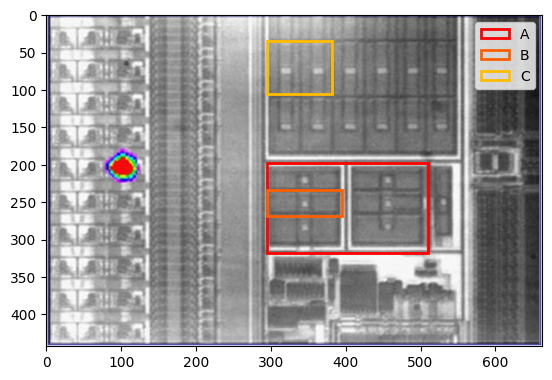

In [4]:
# The background image
image = plt.imread("./images/photon_emission.png")
# Get axes
ax = plt.gca()
# Plot backgrund image
ax.imshow(image)

# Add the rectangles to the current axes
rectangles = [
    dict(xy=(295, 198), width=215, height=120, label="A",),
    dict(xy=(295, 234), width=100, height=35, label="B",),
    dict(xy=(295, 35), width=87, height=70, label="C",),
]
for i, rect in enumerate(rectangles):
    args = picker.pick_combination(i)
    args.update(rect)
    # note that we use **dict to unpack the dictionary into keyword arguments
    ax.add_patch(Rectangle(linewidth=2, fill=False, **args))

# if you don't want to define the rectangles as a separate list, you can write the code like this
# ax.add_patch(Rectangle(linewidth=2, fill=False, xy=(295, 198), width=215, height=120, **picker.pick_combination(0)))
# ax.add_patch(Rectangle(linewidth=2, fill=False, xy=(295, 234), width=100, height=35, **picker.pick_combination(1)))
# ax.add_patch(Rectangle(linewidth=2, fill=False, xy=(295, 35), width=87, height=70, **picker.pick_combination(2)))
# ...

plt.legend()
plt.show()